In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# Load data
file_2022 = pd.read_excel('Region_4A_DA_MORONG_RIZAL_1-1-22_12-00_AM_1_Year_1732084536_v2.xlsx')
file_2023 = pd.read_excel('Region_4A_DA_MORONG_RIZAL_1-1-23_12-00_AM_1_Year_1732084578_v2.xlsx')
file_2024 = pd.read_excel('Region_4A_DA_MORONG_RIZAL_1-1-24_12-00_AM_1_Year_1732084607_v2.xlsx')

# Prepare the data
cols_needed = ['Date & Time', 'Rain - mm', 'Rain Rate - mm/h']
df_2022 = file_2022[cols_needed]
df_2023 = file_2023[cols_needed]
df_2024 = file_2024[cols_needed]
combined_df = pd.concat([df_2022, df_2023, df_2024], ignore_index=True)

In [3]:
# Convert Date column to datetime
train_dates = pd.to_datetime(combined_df['Date & Time'])

In [4]:
# Prepare data for training (using both rainfall and rain rate)
cols = ['Rain - mm', 'Rain Rate - mm/h']
training_df = combined_df[cols].astype(float)


In [5]:
# Convert Date column to datetime
train_dates = pd.to_datetime(combined_df['Date & Time'])

In [6]:
# Standardize the data
scalar = StandardScaler()
training_df_scaled = scalar.fit_transform(training_df)


In [7]:
# Prepare lists for trainX (input data) and trainY (target data)
trainX = [] 
trainY = []

n_past = 20  # Look at the past 20 values
n_fut = 100  # Predict the next 100 values

# Create sequences of data
for i in range(n_past, len(training_df_scaled) - n_fut + 1):
    trainX.append(training_df_scaled[i - n_past:i, 0:training_df_scaled.shape[1]])
    trainY.append(training_df_scaled[i + n_fut - 1:i + n_fut, 0])

# Convert lists to numpy arrays
trainX, trainY = np.array(trainX), np.array(trainY)



In [8]:
# Define and summarize the LSTM model
model = Sequential()
model.add(LSTM(32, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(32, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.3))

model.add(Dense(trainY.shape[1]))
model.compile(optimizer='adam', loss='mse')

model.summary()


C:\Users\nikki\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 20, 32)         │         4,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 20, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 20, 32)         │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,153 (82.63 KB)

 Trainable params: 21,153 (82.63 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Train the model
history = model.fit(trainX, trainY, epochs=30, batch_size=5, validation_split=0.2, verbose=1)

Epoch 1/30
16180/16180 ━━━━━━━━━━━━━━━━━━━━ 147s 9ms/step - loss: 0.5289 - val_loss: 14.4790
Epoch 2/30
16180/16180 ━━━━━━━━━━━━━━━━━━━━ 144s 9ms/step - loss: 0.1728 - val_loss: 2.1251
Epoch 3/30
16180/16180 ━━━━━━━━━━━━━━━━━━━━ 139s 9ms/step - loss: 0.1731 - val_loss: 2.1629
Epoch 4/30
16180/16180 ━━━━━━━━━━━━━━━━━━━━ 141s 9ms/step - loss: 0.1602 - val_loss: 2.1692
Epoch 5/30
16180/16180 ━━━━━━━━━━━━━━━━━━━━ 148s 9ms/step - loss: 0.1626 - val_loss: 2.1209
Epoch 6/30
16180/16180 ━━━━━━━━━━━━━━━━━━━━ 146s 9ms/step - loss: 0.1753 - val_loss: 2.2119
Epoch 7/30
16180/16180 ━━━━━━━━━━━━━━━━━━━━ 144s 9ms/step - loss: 0.1559 - val_loss: 2.3956
Epoch 8/30
16180/16180 ━━━━━━━━━━━━━━━━━━━━ 150s 9ms/step - loss: 0.1500 - val_loss: 3.6324
Epoch 9/30
16180/16180 ━━━━━━━━━━━━━━━━━━━━ 147s 9ms/step - loss: 0.1468 - val_loss: 2.2601
Epoch 10/30
16180/16180 ━━━━━━━━━━━━━━━━━━━━ 145s 9ms/step - loss: 0.1674 - val_loss: 2.2792
Epoch 11/30
16180/16180 ━━━━━━━━━━━━━━━━━━━━ 150s 9ms/step - loss: 0.1574 - va

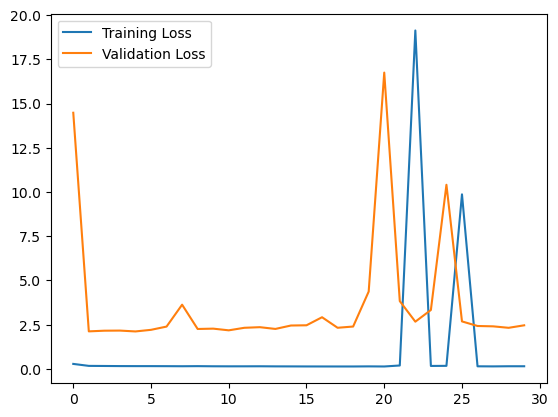

In [10]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()

In [11]:
# Evaluate the model (using last 100 data points as test data)
evaluate_model(model, trainX[-100:], trainY[-100:])

NameError: name 'evaluate_model' is not defined

In [ ]:
# Make predictions for the next 100 time steps
future_predictions = predict_future(model, training_df_scaled, n_past, n_fut)

In [ ]:

# Plot future predictions
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(training_df_scaled), len(training_df_scaled) + n_fut), future_predictions, label='Future Predictions', color='green')
plt.title('Future Rainfall Predictions')
plt.xlabel('Time Steps')
plt.ylabel('Rainfall Rate (mm/h)')
plt.legend()
plt.grid()
plt.show()